任务: 泰坦尼克号乘客生存预测

流程: 
```
1. 数据读取与清洗
2. 特征工程（提取特征与细化）
3. 模型训练
4. 模型评估
```

In [1]:
import pandas as pd
import numpy as np

数据读取

In [2]:
data = pd.read_csv("/data/ys_data/titanic/train.csv")
test = pd.read_csv("/data/ys_data/titanic/test.csv")

数据清洗

In [3]:
# 合并两个数据集查看整体数据集信息，合并数据集并忽略缺失值
full = data._append(test, ignore_index=True)

In [4]:
# 查看数据集整体情况，查看缺失数据并规划数据清洗
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


数据清洗的方法：

A如果是数值型，用平均数取代

B如果是分类数据，用最常见的类别取代

C使用模型预测缺失值，例如：K-NN

In [5]:
# 用均值填充Age和Fare
full['Age'] = full['Age'].fillna(full['Age'].mean())
full['Fare'] = full['Fare'].fillna(full['Fare'].mean())

In [6]:
# 查看Embarked常见类别
full['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [7]:
# 用常见的类别填充Embarked
full['Embarked'] = full['Embarked'].fillna('S')

In [8]:
# Cabin一列缺失较多，暂填充为u，代表未知
full['Cabin'] = full['Cabin'].fillna('u')

In [9]:
# 填充完成后查看数据集
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


特征提取

In [10]:
# 对性别进行替换（male->1, female->2）
sex_mapDict = { "male" : 1, 
               "female" : 0}
full['Sex'] = full['Sex'].map(sex_mapDict)

In [11]:
full['Sex']

0       1
1       0
2       0
3       0
4       1
       ..
1304    1
1305    0
1306    1
1307    1
1308    1
Name: Sex, Length: 1309, dtype: int64

In [12]:
# Embarked转化为one-hot编码
EmbarkedDf = pd.DataFrame()
EmbarkedDf = pd.get_dummies(full['Embarked'], prefix='Embarked', dtype=int)

# 转化完成后查看
EmbarkedDf.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [13]:
# 虚拟变量导入full, 将Embarked转化为one-hot编码
full = pd.concat([full, EmbarkedDf], axis=1)
full.drop("Embarked", axis=1, inplace=True)

# 转化完成后查看
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,u,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,u,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,u,0,0,1


In [14]:
# 对pclass也进行操作，转化为one-hot编码
pclassDf = pd.DataFrame()
pclassDf = pd.get_dummies(full['Pclass'], prefix='Pclass', dtype=int)

# 转化完成后查看
pclassDf.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [15]:
# 处理后的pclass加入full，并且替换full中的pclass行
full = pd.concat([full, pclassDf], axis=1)
full.drop('Pclass', axis=1, inplace=True)

# 处理后查看full
full.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,u,0,0,1,0,0,1
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1.0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,u,0,0,1,0,0,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1,1,0,0
4,5,0.0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,u,0,0,1,0,0,1


In [16]:
# 获取name中隐含的Title，可能对是否生存有影响
def getTitle(name: str) -> str:
    str1 = name.split(',')[1]
    str2 = str1.split('.')[0]
    str3 = str2.strip()
    return str3

# 对所有的name对象进行getTitle，提取头衔
titleDf = pd.DataFrame()
titleDf['Title'] = full['Name'].map(getTitle)
titleDf.head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [17]:
# 查看titleDf内的类别，便于映射对应关系
titleDf.value_counts()

Title       
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Sir               1
Capt              1
Mme               1
Lady              1
Jonkheer          1
Dona              1
Don               1
the Countess      1
Name: count, dtype: int64

In [18]:
# 映射头衔的对应关系
title_mapDict = {
    "Capt" : "Officer",
    "Col" : "Officer",
    "Major" : "Officer",
    "Jonkeer" : "Royalty",
    "Don" : "Royalty",
    "Sir" : "Royalty",
    "Dr" : "Officer",
    "Rev" : "Officer",
    "the Countess" : "Royalty", 
    "Dona" : "Royalty", 
    "Mme" : "Mrs", 
    "Mlle" : "Miss", 
    "Ms" : "Mrs", 
    "Mr" : "Mr", 
    "Mrs" : "Mrs", 
    "Miss" : "Miss", 
    "Master" : "Master", 
    "Lady" : "Royalty"
}
titleDf['Title'] = titleDf['Title'].map(title_mapDict)

# 提取成为one-hot编码
titleDf = pd.get_dummies(titleDf['Title'], dtype=int)

# 提取完成后查看结果
titleDf.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [19]:
# 处理后的Name行替换掉full中的Name行
full = pd.concat([full, titleDf], axis=1)
full.drop('Name', axis=1, inplace=True)

# 填充完成后查看
full.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,...,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,0.0,1,22.0,1,0,A/5 21171,7.2500,u,0,...,1,0,0,1,0,0,1,0,0,0
1,2,1.0,0,38.0,1,0,PC 17599,71.2833,C85,1,...,0,1,0,0,0,0,0,1,0,0
2,3,1.0,0,26.0,0,0,STON/O2. 3101282,7.9250,u,0,...,1,0,0,1,0,1,0,0,0,0
3,4,1.0,0,35.0,1,0,113803,53.1000,C123,0,...,1,1,0,0,0,0,0,1,0,0
4,5,0.0,1,35.0,0,0,373450,8.0500,u,0,...,1,0,0,1,0,0,1,0,0,0


In [20]:
# 处理Cabin，按舱位分类
cabinDf = pd.DataFrame()

# 匿名函数Lambda，取第一位
full['Cabin'] = full['Cabin'].map(lambda c : c[0])

# 转化为one-hot编码
cabinDf = pd.get_dummies(full['Cabin'], prefix='Cabin', dtype=int)

# 填充完成后查看
cabinDf.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_u
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [21]:
# 处理后的Cabin替换full中的Cabin
full = pd.concat([full, cabinDf], axis=1)
full.drop('Cabin', axis=1, inplace=True)

# 处理后查看full结构
full.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,...,Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_u
0,1,0.0,1,22.0,1,0,A/5 21171,7.2500,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,0,38.0,1,0,PC 17599,71.2833,1,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1.0,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1.0,0,35.0,1,0,113803,53.1000,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0.0,1,35.0,0,0,373450,8.0500,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
# 家庭人数总结与家庭大小分类，家庭人数等于直系亲属（parch）+非直系亲属（Sibsp）+本人（1）
familyDf = pd.DataFrame()
familyDf['Family'] = full['Parch'] + full['SibSp'] + 1

# 对人数进行分类，分为小家庭（1）中等家庭（2-4）以及大家庭（>=5）
familyDf['F_S'] = familyDf['Family'].map(lambda s:1 if s == 1 else 0)
familyDf['F_M'] = familyDf['Family'].map(lambda s:1 if 2 <= s <= 4 else 0)
familyDf['F_L'] = familyDf['Family'].map(lambda s:1 if s >= 5 else 0)

# 处理完成查看表
familyDf.head()

,Family,F_S,F_M,F_L
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [23]:
# 将处理完成的表加入full
full = pd.concat([full, familyDf], axis=1)

# 加入完成查看full
full.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_u,Family,F_S,F_M,F_L
0,1,0.0,1,22.0,1,0,A/5 21171,7.2500,0,0,...,0,0,0,0,0,1,2,0,1,0
1,2,1.0,0,38.0,1,0,PC 17599,71.2833,1,0,...,0,0,0,0,0,0,2,0,1,0
2,3,1.0,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,...,0,0,0,0,0,1,1,1,0,0
3,4,1.0,0,35.0,1,0,113803,53.1000,0,0,...,0,0,0,0,0,0,2,0,1,0
4,5,0.0,1,35.0,0,0,373450,8.0500,0,0,...,0,0,0,0,0,1,1,1,0,0


相关系数法筛选特征值

In [24]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr

# 提取出数据集内的数据，并且进行特征提取
source_row = 891
feature_cols = [i for i in full.columns if i not in ['Ticket', 'Survived']]
features = full[feature_cols]
features = features[0:source_row]
target = full['Survived'][0:source_row]

In [25]:
# 采用pearson系数计算相关系数并选择，降序输出
rate_dict = {}
for i in features.columns:
    rate_dict[i] = pearsonr(features[i], target)[0]
result = sorted(rate_dict.items(), key=lambda s:s[1], reverse=True)
for each in result:
    print(each)

('Mrs', 0.3449349674862874)
('Miss', 0.33279543489730845)
('Pclass_1', 0.2859037677837427)
('F_M', 0.27985454703328405)
('Fare', 0.2573065223849623)
('Cabin_B', 0.17509503365047557)
('Embarked_C', 0.16824043121823312)
('Cabin_D', 0.15071564423048245)
('Cabin_E', 0.14532144323642823)
('Cabin_C', 0.11465211543263726)
('Pclass_2', 0.09334857241192884)
('Master', 0.08522056083929425)
('Parch', 0.08162940708348349)
('Cabin_F', 0.05793494702080395)
('Royalty', 0.050561445424860754)
('Cabin_A', 0.022286953811301802)
('Family', 0.01663898928274525)
('Cabin_G', 0.016040182686507552)
('Embarked_Q', 0.0036503826839722094)
('PassengerId', -0.005006660767066494)
('Cabin_T', -0.026456468796962347)
('Officer', -0.031315670437736254)
('SibSp', -0.03532249888573554)
('Age', -0.07032267528829975)
('F_L', -0.1251471239853068)
('Embarked_S', -0.14968272327068555)
('F_S', -0.20336708569989184)
('Cabin_u', -0.3169115231122961)
('Pclass_3', -0.32230835737297003)
('Sex', -0.5433513806577552)
('Mr', -0.5491991

划分训练集

In [68]:
# 提取训练集和测试集
train = full[0:source_row]
pred_X = full.drop(['Survived','Ticket'], axis=1, inplace=False)[source_row:]

# XGBoost 训练不需要手动分割训练集与测试集

模型训练与调优

调参的通用方法：
- 选择一个相对较高的学习率。通常来说学习率设置为0.1。但是对于不同的问题可以讲学习率设置在0.05-0.3。通过交叉验证来寻找符合学习率的最佳树的个数。
- 当确定好学习率与最佳树的个数时，调整树的某些特定参数。比如：max_depth, min_child_weight, gamma, subsample, colsample_bytree
- 调整正则化参数 ，比如： lambda, alpha。这个主要是为了减少模型复杂度和提高运行速度的。适当地减少过拟合。
- 降低学习速率，选择最优参数

In [31]:
# 引入模型并定义模型训练与评估函数
import xgboost as xgb

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

from xgboost.sklearn import XGBClassifier
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV

In [240]:
# 定义模型训练与评估函数
def modelfit(alg, dtrain, feature_cols, useTrainCV=True, cv_folds=5, early_stopping_rounds=10000):
    
    # Use the cv provided by XGB
    if useTrainCV:
        # Get params in estimator
        xgb_param = alg.get_xgb_params()
        
        # Transmit to DMatrix form
        xgtrain = xgb.DMatrix(dtrain[feature_cols].values, label=dtrain['Survived'].values)
        
        # Use cv to grab the best n_estimators and set in estimators
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds, metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
        
    # Fit the algorithm on the data
    alg.fit(dtrain[feature_cols], dtrain['Survived'])
    
    # Predict training set
    dtrain_predictions = alg.predict(dtrain[feature_cols])
    dtrain_predprob = alg.predict_proba(dtrain[feature_cols])[:,1]
    
    # Print model report
    print("Model Report:")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Survived'].values, dtrain_predictions))
    print("AUC Score (Train) : %f" % metrics.roc_auc_score(dtrain['Survived'], dtrain_predprob))
    print("Best n_estimators : %d" % cvresult.shape[0])
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [247]:
# 设置参数初始值

# 调试完gamma和max/min后重新调试n_estimators
estimator = XGBClassifier(
    learning_rate=0.3,
    n_estimators=20,
    max_depth=5,
    min_child_weight=1,
    gamma=0.33,
    subsample=0.8,
    colsample_bytree=0.78,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=6,
    eval_metric='auc')

Model Report:
Accuracy : 0.9169
AUC Score (Train) : 0.962196
Best n_estimators : 20


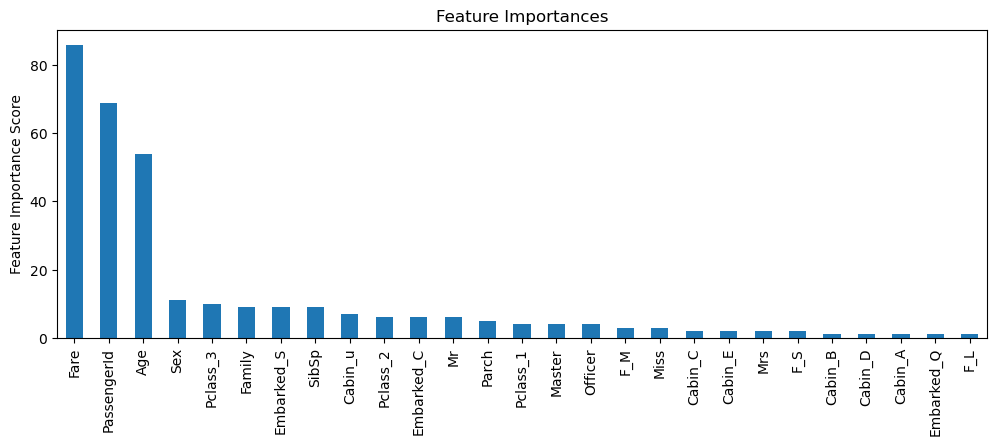

In [248]:
# 调整n_estimators

# 最终确定：n_estimator = 20
modelfit(estimator, train, feature_cols)

In [250]:
# 调整max_depth和min_child_weight (3, 10, 2) -> [8, 9, 10]; (1, 6, 2) -> (2, 3, 4)

# 最终确定：max_depth = 5, min_child_weight = 1

# 预设变量
param_tune1 = {
    'max_depth' : [6, 7, 8],
    'min_child_weight' : [1, 2, 3]
}

# 初始化网格搜索
gsearch1 = GridSearchCV(estimator= XGBClassifier(learning_rate=0.3,
    n_estimators=20,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=6,
    eval_metric='auc'), 
                        param_grid=param_tune1,
                        scoring='roc_auc',
                        n_jobs=4, 
                        cv=5)
gsearch1.fit(train[feature_cols], train['Survived'])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.03771443, 0.02608047, 0.02890635, 0.04611392, 0.04543872,
         0.04237385, 0.02257271, 0.02097983, 0.02277989]),
  'std_fit_time': array([0.02102742, 0.01264574, 0.01897584, 0.02125203, 0.03204332,
         0.02231117, 0.00148032, 0.00039678, 0.00560784]),
  'mean_score_time': array([0.00939612, 0.0075387 , 0.0077435 , 0.00774412, 0.00684295,
         0.00736976, 0.00657969, 0.00617142, 0.00815067]),
  'std_score_time': array([2.62665781e-03, 3.01495595e-03, 2.42346137e-03, 2.15888009e-03,
         7.48417067e-04, 2.18525493e-03, 6.38350283e-04, 5.75055333e-05,
         4.09481508e-03]),
  'param_max_depth': masked_array(data=[6, 6, 6, 7, 7, 7, 8, 8, 8],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 2, 3, 1, 2, 3, 1, 2, 3],
               mask=[False, False, False, False, False, False, False, 

In [253]:
# 调整gamma值 [i/100.0 for i in range(0, 100)] -> [i/1000.0 for i in range(0, 20)]

# 最终确定gamma值为0.248

param_tune2 = {
    'gamma' : [i/1000.0 for i in range(200, 300)]
}

# 初始化网格搜索
gsearch2 = GridSearchCV(estimator= XGBClassifier(learning_rate=0.3,
    n_estimators=20,
    max_depth=7,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=6,
    eval_metric='auc'), 
                        param_grid=param_tune2,
                        scoring='roc_auc',
                        n_jobs=4, 
                        cv=5)
gsearch2.fit(train[feature_cols], train['Survived'])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([0.05227966, 0.0270812 , 0.03773241, 0.06352892, 0.04051981,
         0.03441682, 0.04656267, 0.04707532, 0.03072524, 0.04110198,
         0.04848094, 0.0330441 , 0.02600155, 0.04644108, 0.03755784,
         0.04406686, 0.03137951, 0.03063483, 0.02615051, 0.02817483,
         0.03486276, 0.04101734, 0.03970017, 0.04302478, 0.03460131,
         0.0434413 , 0.03723292, 0.03016353, 0.03074865, 0.03649163,
         0.02987099, 0.03279018, 0.02621398, 0.03998742, 0.02602935,
         0.03054385, 0.02915845, 0.03163128, 0.0317832 , 0.02168927,
         0.03200521, 0.0479239 , 0.05826883, 0.02843132, 0.02981119,
         0.01940784, 0.03003936, 0.02374768, 0.0275238 , 0.02467184,
         0.03359375, 0.02552409, 0.02546649, 0.02908869, 0.04756618,
         0.03699245, 0.04032955, 0.03919792, 0.02731409, 0.03134789,
         0.03114238, 0.03493032, 0.04264755, 0.02577715, 0.02675266,
         0.02787361, 0.03812008, 0.01880374, 0.02558651, 0.02468901,
         0.033682

In [254]:
# 调整subsample和colsample_bytree参数 [i/10.0 for i in range(6, 10)] -> [i/100.0 for i in range(70, 90)]

# 最后确定
# subsample = 0.8
# colsample_bytree = 0.78

param_tune3 = {
    'subsample' : [i/100.0 for i in range(70, 90)],
    'colsample_bytree' : [i/100.0 for i in range(70, 90)]
}

# 初始化网格搜索
gsearch3 = GridSearchCV(estimator= XGBClassifier(learning_rate=0.3,
    n_estimators=20,
    max_depth=7,
    min_child_weight=1,
    gamma=0.248,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=6,
    eval_metric='auc'), 
                        param_grid=param_tune3,
                        scoring='roc_auc',
                        n_jobs=4, 
                        cv=5)
gsearch3.fit(train[feature_cols], train['Survived'])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([0.02963333, 0.02666302, 0.08486781, 0.0505331 , 0.04047546,
         0.06914563, 0.04998569, 0.03734264, 0.01955538, 0.04094682,
         0.04144845, 0.02942991, 0.03064661, 0.03397532, 0.06111746,
         0.05772028, 0.02480845, 0.02333088, 0.03716311, 0.03397474,
         0.02400222, 0.02069516, 0.02047033, 0.02404022, 0.03096786,
         0.02790942, 0.02146988, 0.02788916, 0.0350688 , 0.01950202,
         0.0283823 , 0.02987533, 0.03224316, 0.01980939, 0.01945281,
         0.0241076 , 0.03061748, 0.02281923, 0.03169003, 0.03188114,
         0.02437329, 0.01944036, 0.01743417, 0.02679367, 0.04665642,
         0.01807365, 0.03083773, 0.02850089, 0.03625236, 0.03222542,
         0.02062941, 0.04062929, 0.0185504 , 0.03501   , 0.02159128,
         0.03911653, 0.0199687 , 0.03788548, 0.06341329, 0.04407663,
         0.03151455, 0.01860704, 0.02394361, 0.04322391, 0.03074274,
         0.04943299, 0.03801999, 0.02220411, 0.02729321, 0.02367654,
         0.035642

In [255]:
# 正则化参数调优

# 最后确定reg_alpha = 1e-5

param_tune4 = {
    'reg_alpha' : [1e-5, 1e-2, 0.1, 1, 100]
}

# 初始化网格搜索
gsearch4 = GridSearchCV(estimator= XGBClassifier(learning_rate=0.3,
    n_estimators=20,
    max_depth=7,
    min_child_weight=1,
    gamma=0.248,
    subsample=0.8,
    colsample_bytree=0.78,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=6,
    eval_metric='auc'), 
                        param_grid=param_tune4,
                        scoring='roc_auc',
                        n_jobs=4, 
                        cv=5)
gsearch4.fit(train[feature_cols], train['Survived'])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([0.03495793, 0.02382603, 0.03182898, 0.01999435, 0.0344873 ]),
  'std_fit_time': array([0.01494342, 0.00319997, 0.00735003, 0.00141855, 0.01700217]),
  'mean_score_time': array([0.00859523, 0.00784869, 0.01007442, 0.00643506, 0.00704551]),
  'std_score_time': array([0.00288283, 0.00275375, 0.00643339, 0.00020309, 0.00137879]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.87160738, 0.86455863, 0.86653491, 0.84769433, 0.5       ]),
  'split1_test_score': array([0.8230615 , 0.81891711, 0.81624332, 0.8138369 , 0.5       ]),
  'split2_test_score': array([0.91490642, 0.9131016 , 0.90661765, 0.89852941, 0.5       ]),
  'split3_test_score': array([0.89525401, 0.89498663, 0.87252674,

In [268]:
# 降低学习率

estimator = XGBClassifier(
    learning_rate=0.3,
    n_estimators=20,
    max_depth=9,
    min_child_weight=3,
    gamma=0.008,
    subsample=0.76,
    colsample_bytree=0.75,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=6,
    reg_alpha=1e-5,
    eval_metric='auc')

Model Report:
Accuracy : 0.9068
AUC Score (Train) : 0.964348
Best n_estimators : 20


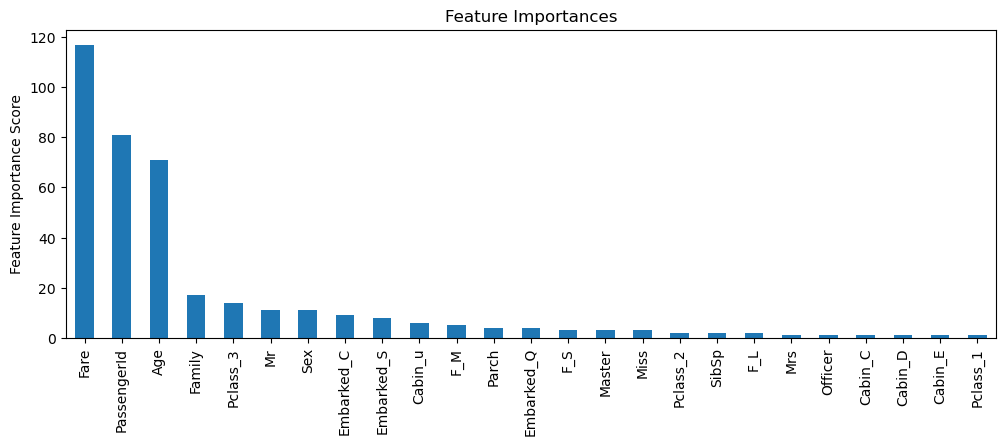

In [269]:
modelfit(estimator, train, feature_cols)

数据预测

In [270]:
pred_Y = estimator.predict(pred_X)
pred_Y = pred_Y.astype(int)

# 接入passenger_id
passenger_id = full['PassengerId'][source_row:]
predDf = pd.DataFrame({'PassengerId' : passenger_id, 
                     'Survived' : pred_Y})

# 预测完成后查看
predDf.head()

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1


保存结果

In [271]:
predDf.to_csv('/data/ys_data/titanic/titanic_pred_XGB.csv', index=False)